In [1]:
from math import inf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import choices, randint, random

In [2]:
VALUE = 0
WEIGHT = 1 


with open('dataset') as f:
    LIMIT = int(f.readline())
    VALUES = map(int, f.readline().rstrip().split(', '))
    WEIGHTS = map(int, f.readline().rstrip().split(', '))
    ITEMS = list(zip(VALUES, WEIGHTS))

In [3]:
def initial_pop(size):
    return [[randint(0, 1) for i in ITEMS] for _ in range(size)]


def evaluate_pop(pop):
    return [evaluate_individual(indiv) for indiv in pop]


def evaluate_individual(indiv):
    indiv_weight = 0
    indiv_sum = 0

    for i, item in enumerate(indiv):
        if item:
            indiv_weight += ITEMS[i][WEIGHT]
            indiv_sum += ITEMS[i][VALUE]

    return 0 if indiv_weight > LIMIT else indiv_sum


def mutate(indiv):
    idx = randint(0, len(indiv) - 1)
    indiv[idx] = 1 - indiv[idx]


def evolve(pop, parents_ratio, child_ration, mutation):
    pop = sorted(pop, reverse=True, key=evaluate_individual)
    parents = pop[:int(parents_ratio * len(pop))]
    fit = evaluate_pop(pop)
    sum_fit = sum(fit)
    prob = list(map(lambda f: f / sum_fit, fit))

    num_children = int()
    new_gen = []

    for _ in range(int(len(pop) * child_ration)):
        first = choices(pop,  weights=prob, k=1)[0]
        second = choices(pop,  weights=prob, k=1)[0]
        idx = randint(0, len(first) - 1)

        offspring = first[:idx] + second[idx:]
        if random() <= mutation:
            mutate(offspring)

        new_gen.append(offspring)

    return sorted(pop + new_gen, reverse=True, key=evaluate_individual)[:len(pop)]


def evolve_population(num_gen, pop_size, parents_ratio, child_ratio, mutation):
    pop = initial_pop(pop_size)
    best_indiv = None
    best_val = -inf
    best_vals = []

    for _ in range(num_gen):
        pop = sorted(pop, reverse=True, key = evaluate_individual)
        crt_best_indiv = pop[0]
        crt_best_val = evaluate_individual(crt_best_indiv)
        best_vals.append(crt_best_val)

        if crt_best_val > best_val:
            best_indiv = crt_best_indiv
            best_val = crt_best_val

        pop = evolve(pop, parents_ratio, child_ratio, mutation)

    plt.plot(best_vals)

    return best_indiv, best_val

Best value = 306
Best choice = [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


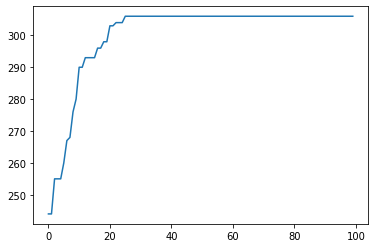

In [4]:
POP_SIZE = 1000
NUM_GEN = 100

best_indiv, best_val = evolve_population(NUM_GEN, POP_SIZE, 0.1, 0.9, 0.1)
print(f'Best value = {best_val}\nBest choice = {best_indiv}')

Crossoverul il fac intr-un punct aleator, la fel si mutatia. Difera modul in care selectez indivizii care se reproduc: eu ii iau pe cei mai buni 10% conform testului de fitness si ii combin aleator pentru a obtine inca 90% copii. La final, din toata populatia (cei vechi + cei noi) ii pastrez pe cei mai buni conform functiei de fitness.